In [ ]:
#Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt



In [ ]:

#Import the data set
df = pd.read_csv('ratings_Electronics.csv')
df.head()
df_copy = df.copy(deep=True) #Copying the data to another dataframe
print(df_copy.head())
num_observations = len(df_copy)
print(f"\nNumber of observations: {num_observations}")

          user_id    prod_id  rating
0  A2CX7LUOHB2NDG  321732944       5
1  A2NWSAGRHCP8N5  439886341       1
2  A2WNBOD3WNDNKT  439886341       3
3  A1GI0U4ZRJA8WN  439886341       1
4  A1QGNMC6O1VW39  511189877       5

Number of observations: 1048575


In [ ]:

rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)


No of rows =  1048575
No of columns =  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  object
 1   prod_id  1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [ ]:
# Find number of missing values in each column
df.isna().sum()


user_id    0
prod_id    0
rating     0
dtype: int64

In [ ]:
# Summary statistics of 'rating' variable
df['rating'].describe()


count    1.048575e+06
mean     3.973379e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

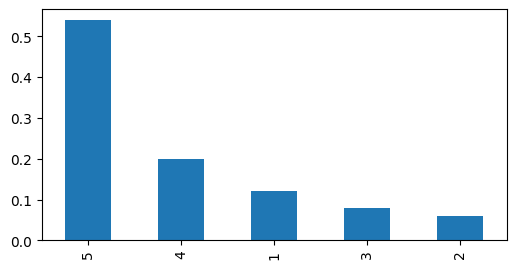

In [ ]:
#Create the plot and provide observations

plt.figure(figsize = (6,3))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()


In [ ]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['prod_id'].nunique())


Number of unique USERS in Raw data =  786329
Number of unique ITEMS in Raw data =  61893


In [ ]:
# Top 10 users based on rating
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated


user_id
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     95
A203OCQQ12MAVT     90
dtype: int64

In [ ]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['prod_id'].nunique())


The number of observations in the final data = 3456
Number of unique USERS in the final data =  38
Number of unique PRODUCTS in the final data =  2943


In [ ]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()


Shape of final_ratings_matrix:  (38, 2943)
given_num_of_ratings =  3456
possible_num_of_ratings =  111834
density: 3.09%


prod_id,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Rank Based Recommendation System

#Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()


,avg_rating,rating_count
prod_id,,
B0009VNE0S,5.0,1
B0002ZA7I8,5.0,1
B00008VFCS,5.0,1
B000EXS1BS,5.0,1
B00008VF7U,5.0,1


In [ ]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]


In [ ]:
# Recommending top 5 products with 50 minimum interactions based on popularity
list(top_n_products(final_rating, 5, 50))


[]

In [ ]:
#Recommending top 5 products with 100 minimum interactions based on popularity

list(top_n_products(final_rating, 5, 100))


[]

In [ ]:
#Collaborative Filtering based Recommendation System
# User based collaborative filtering

final_ratings_matrix.head()


prod_id,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()


prod_id,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score


In [ ]:
#Finding out top 10 similar users to the user index 3 and their similarity score

similar = similar_users(3,final_ratings_matrix)[0][0:10]
similar

#Print the similarity score
similar_users(3,final_ratings_matrix)[1][0:10]


[array([[0.03297923]]),
 array([[0.02837639]]),
 array([[0.02366796]]),
 array([[0.0194539]]),
 array([[0.01888701]]),
 array([[0.01874071]]),
 array([[0.01830041]]),
 array([[0.01806024]]),
 array([[0.0171518]]),
 array([[0.01352711]])]

In [ ]:
#Print the similarity score
similar_users(25,final_ratings_matrix)[1][0:10]

#Print the similarity score
similar_users(25,final_ratings_matrix)[1][0:10]


[array([[0.09344882]]),
 array([[0.03252137]]),
 array([[0.02919346]]),
 array([[0.02837639]]),
 array([[0.02773775]]),
 array([[0.0220432]]),
 array([[0.0163104]]),
 array([[0.01465795]]),
 array([[0.01363174]]),
 array([[0.01279111]])]

In [ ]:
# Function to recommend products

# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]


In [ ]:
# Recommend 5 products to user index 3 based on similarity based collaborative filtering

recommendations(3,5,final_ratings_matrix)


['B00004Z6KW', 'B000066R6M', 'B00007JDR0', 'B000E8OVMQ', 'B00081S0YY']

In [ ]:
#Recommend 5 products to user index 25 based on similarity based collaborative filtering
recommendations(25,5,final_ratings_matrix)


['B0001D3K8A', 'B0007Y836W', 'B00081A2KY', 'B0006AZ57M', 'B0001W2XJI']

In [ ]:
# Model based Collaborative Filtering: Singular Value Decomposition

#CSR matrix

from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)


In [ ]:
#SVD
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 35) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)


In [ ]:
U.shape

(38, 35)

In [ ]:
sigma.shape

(35, 35)

In [ ]:
Vt.shape

(35, 2943)

In [ ]:
# Predicting ratings

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)


In [ ]:
# Function to recommend products

import numpy as np

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):

    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')

    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]

    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))


In [ ]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(32,final_ratings_sparse,preds_matrix,5)



Below are the recommended products for user(user_id = 32):

Recommended Products
1688    0.697233
1451    0.576149
2062    0.576149
272     0.576149
2208    0.576149
Name: user_predictions, dtype: float64


In [ ]:
recommend_items(32,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 32):

Recommended Products
1688    0.697233
1451    0.576149
2062    0.576149
272     0.576149
2208    0.576149
2232    0.576149
2209    0.576149
2064    0.576149
93      0.576149
2063    0.576149
Name: user_predictions, dtype: float64


In [ ]:
# Evaluating the model

final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()


prod_id,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
average_rating = final_ratings_matrix.mean()
average_rating.head()


prod_id
1400532655    0.026316
1400599997    0.026316
9043413585    0.078947
998376234X    0.026316
B000000O48    0.131579
dtype: float64

In [ ]:
preds_df.head()

prod_id,1400532655,1400599997,9043413585,998376234X,B000000O48,B000001OL6,B000001OMI,B000001OMN,B00000DM9W,B00000J05A,...,B000I992XY,B000I9B2AA,B000IALP88,B000IBRX4M,B000ICZZJG,B000IDCDZY,B000IDWDKO,B000IE5XIC,B000IE8Z4Q,B000IF4788
0,0.000104,0.005094,0.001452,0.002615,0.001738,0.000856,0.000024,1.998541,0.002598,0.000439,...,0.000447,0.000024,0.000520,0.000312,0.002598,0.000015,0.013627,0.013073,0.001397,0.005989
1,0.007997,0.013195,0.011208,0.018888,0.022027,0.003321,0.011021,0.010709,0.029731,0.019552,...,0.003604,0.011021,0.039985,0.023991,0.029731,0.006612,0.092744,0.094440,0.011792,0.057690
2,0.001016,0.002458,0.000106,0.005249,0.000498,0.001294,0.001298,0.002756,0.006798,0.002508,...,0.000124,0.001298,0.005078,0.003047,0.006798,0.000779,0.025053,0.026246,0.003109,0.000032
3,0.000827,0.095715,0.009752,0.008491,0.000380,0.000313,0.002836,0.000622,0.016957,0.001736,...,0.000708,0.002836,0.004133,0.002480,0.016957,0.001702,0.007889,0.042455,0.007144,0.003506
4,0.000302,0.007764,0.002032,0.005010,0.005217,0.001444,0.000448,0.002070,0.005566,0.001030,...,0.001281,0.000448,0.001510,0.000906,0.005566,0.000269,0.020279,0.025052,0.002990,0.015667


In [ ]:
avg_preds=preds_df.mean()
avg_preds.head()


prod_id
1400532655    0.027147
1400599997    0.019836
9043413585    0.085165
998376234X    0.035288
B000000O48    0.139260
dtype: float64

In [ ]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()





,Avg_actual_ratings,Avg_predicted_ratings
prod_id,,
1400532655,0.026316,0.027147
1400599997,0.026316,0.019836
9043413585,0.078947,0.085165
998376234X,0.026316,0.035288
B000000O48,0.131579,0.139260


from matplotlib import pyplot as plt
_df_0['Avg_actual_ratings'].plot(kind='hist', bins=20, title='Avg_actual_ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Avg_predicted_ratings'].plot(kind='hist', bins=20, title='Avg_predicted_ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Avg_actual_ratings', y='Avg_predicted_ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Avg_actual_ratings'].plot(kind='line', figsize=(8, 4), title='Avg_actual_ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Avg_predicted_ratings'].plot(kind='line', figsize=(8, 4), title='Avg_predicted_ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

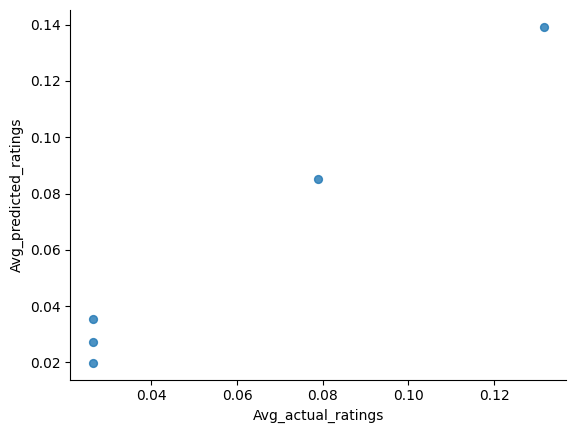

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Avg_actual_ratings', y='Avg_predicted_ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')


RMSE SVD Model = 0.025909334576650303 

